In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import streetview # Thanks to https://github.com/cplusx/google-street-view-panorama-download
from skimage import io
import numpy as np
import os

In [3]:
# Go to https://map.project-osrm.org/
# Draw your path and click the button: Export GPX file
# Then, put your file path here
file_path = "./route.gpx"

In [4]:
def get_lat_long(file_path: str) -> list:
    """Function to load the file and get latitudes and longitudes of the path"""
    with open(file_path) as f:
        content = f.readlines()[1]
        content = content.split("<trkseg>")[1]
        content = content.split("</trkseg>")[0]
        lat_longs = []
        for coords in content.split("lat")[1:]:
            lat, lon = coords.split(" ")[0][1:], coords.split(" ")[1][4:]
            lon = lon[:lon.find("/")]
            lat, lon = eval(lat), eval(lon)
            lat_longs.append((float(lat), float(lon)))
    return lat_longs

def download_images(coords: list, show_img: bool=True, save_dir: str='') -> None:
    """Function to download panorama images from coordinates list"""
    img_cnt = 0
    for lat, lon in coords:
        print(f"Downloading now lat={lat}, lon={lon}")
        panoids = streetview.panoids(lat=lat, lon=lon)
        panoid = panoids[0]['panoid']
        panorama = streetview.download_panorama_v3(panoid, zoom=3, disp=False)
        
        if show_img:
            plt.figure(figsize=(15, 15))
            plt.imshow(panorama)
            plt.axis('off')
            plt.show()
        
        if save_dir:
            if not os.path.exists(save_dir):
                os.mkdir(save_dir)
            # file name format: img_number_latitude_longitude.png
            plt.imsave(f"{save_dir}/img_{img_cnt}_{lat}_{lon}.jpg", panorama)
            img_cnt += 1

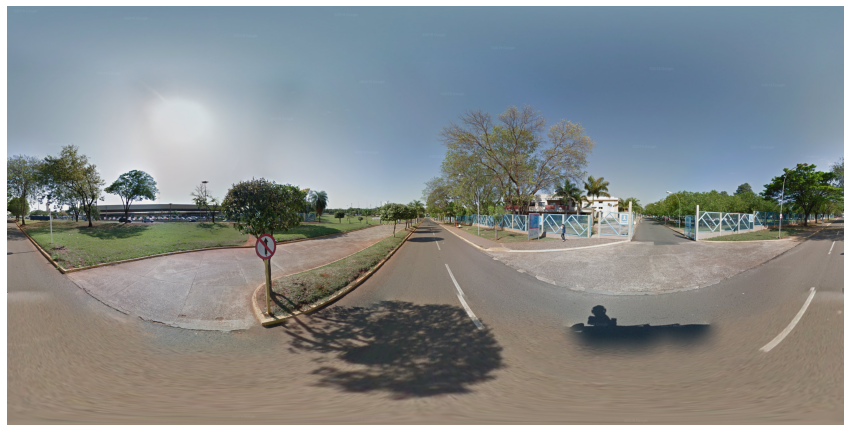

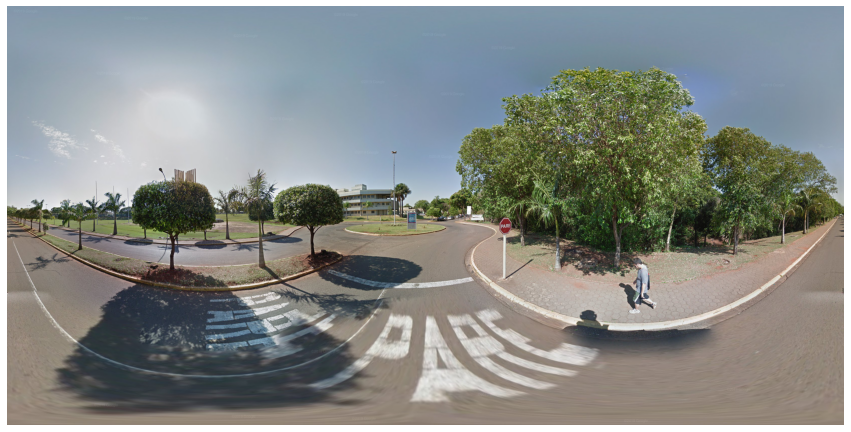

In [ ]:
# Extract your coordinates from your file
coords = get_lat_long(file_path)

# Download panorama images from your coordinates
download_images(coords, show_img=True, save_dir='./images/')